# Bitcoin Price Prediction

## Loading Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading and Preprocessing

In [2]:
df = pd.read_csv('../data/bitcoin_2017_to_2023.csv')

In [3]:
df.head()

,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
0,2023-08-01 13:19:00,28902.48,28902.49,28902.48,28902.49,4.68658,1.354538e+05,258,0.89391,25836.224836
1,2023-08-01 13:18:00,28902.48,28902.49,28902.48,28902.49,4.77589,1.380351e+05,317,2.24546,64899.385195
2,2023-08-01 13:17:00,28908.52,28908.53,28902.48,28902.49,11.52263,3.330532e+05,451,2.70873,78290.170121
3,2023-08-01 13:16:00,28907.41,28912.74,28907.41,28908.53,15.89610,4.595556e+05,483,10.22981,295738.166916
4,2023-08-01 13:15:00,28896.00,28907.42,28893.03,28907.41,37.74657,1.090761e+06,686,16.50452,476955.246611


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3126000 entries, 0 to 3125999
Data columns (total 10 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   timestamp                     object 
 1   open                          float64
 2   high                          float64
 3   low                           float64
 4   close                         float64
 5   volume                        float64
 6   quote_asset_volume            float64
 7   number_of_trades              int64  
 8   taker_buy_base_asset_volume   float64
 9   taker_buy_quote_asset_volume  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 238.5+ MB


In [5]:
df.describe()

,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
count,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06
mean,2.008947e+04,2.010217e+04,2.007666e+04,2.008946e+04,5.290800e+01,1.155882e+06,1.018583e+03,2.632231e+01,5.727211e+05
std,1.605896e+04,1.606926e+04,1.604871e+04,1.605896e+04,9.774388e+01,2.335868e+06,1.817813e+03,4.972880e+01,1.193135e+06
min,2.830000e+03,2.830000e+03,2.817000e+03,2.817000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.624747e+03,7.629600e+03,7.620000e+03,7.624798e+03,1.120167e+01,1.122335e+05,1.500000e+02,5.100715e+00,5.125057e+04
50%,1.169999e+04,1.170681e+04,1.169249e+04,1.170000e+04,2.387539e+01,3.706467e+05,4.130000e+02,1.148990e+01,1.753695e+05
75%,2.989957e+04,2.990724e+04,2.989051e+04,2.989957e+04,5.393630e+01,1.276762e+06,1.026000e+03,2.693009e+01,6.210250e+05
max,6.900000e+04,6.900000e+04,6.878670e+04,6.900000e+04,5.877775e+03,1.459557e+08,1.073150e+05,3.537453e+03,8.947551e+07


In [6]:
df.isnull().sum()

timestamp                       0
open                            0
high                            0
low                             0
close                           0
volume                          0
quote_asset_volume              0
number_of_trades                0
taker_buy_base_asset_volume     0
taker_buy_quote_asset_volume    0
dtype: int64

## Exploratory Data Analysis(EDA)

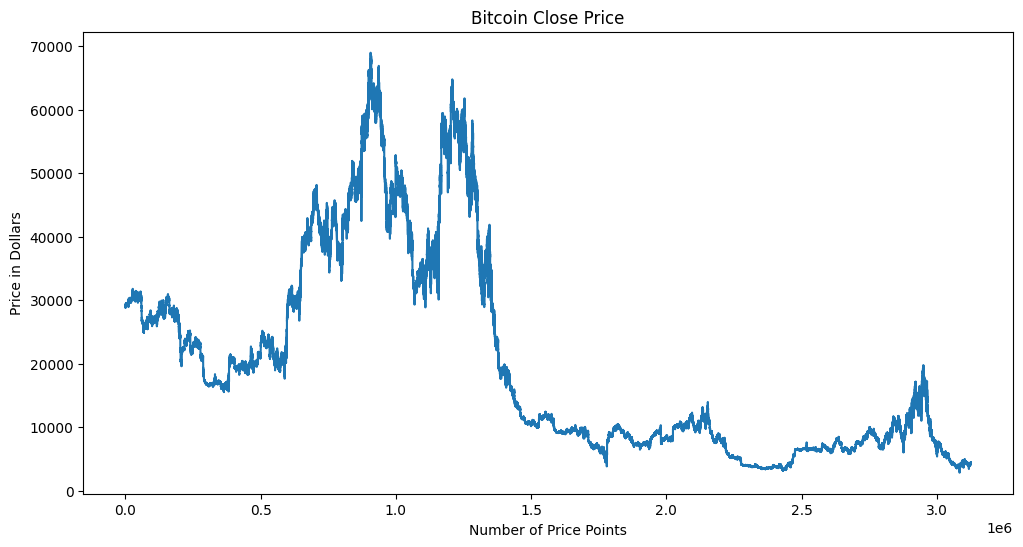

In [7]:
plt.figure(figsize=(12,6))
plt.title("Bitcoin Close Price", fontsize=12)
plt.plot(df["close"])
plt.xlabel("Number of Price Points")
plt.ylabel("Price in Dollars")
plt.show()

### Feature Engineering

In [8]:
splitted = df['timestamp'].str.split(' ', expand=True)
df['date'] = splitted[0].astype('str')
df['time'] = splitted[1].astype('str')

splitted1 = df['date'].str.split('-', expand=True)
df['year'] = splitted1[0].astype('int')
df['month'] = splitted1[1].astype('int')
df['day'] = splitted1[2].astype('int')

splitted2 = df['time'].str.split(':', expand=True)
df['hour'] = splitted2[0].astype('int')
df['minute'] = splitted2[1].astype('int')

In [9]:
df['close-open'] = df['close'] - df['open']
df['high-low'] = df['high'] - df['low']
df['wick_length_high'] = df['high'] - df[['open', 'close']].max(axis=1)
df['wick_length_low'] = df[['open', 'close']].min(axis=1) - df['low']
df['buy_ratio'] = df['taker_buy_base_asset_volume'] / df['volume']
df['volume_delta'] = df['volume'] - df['volume'].shift(-1)
df['trade_activity_rate'] = df['number_of_trades'] / df['volume']

df['target'] = np.where(df['close'] > df['close'].shift(-1), 1, 0) # checks if the price went up (1) or down (0)

In [10]:
# saved the date and time column in separate series for future reference before deleting from the dataframe
# date = pd.Series(df['date'])
# time = pd.Series(df['time'])

In [11]:
df.drop(['date', 'time', 'timestamp', 'open', 'high', 'low', 'year', 
         'taker_buy_quote_asset_volume', 'quote_asset_volume', 'number_of_trades'], 
        axis=1, inplace=True)

In [12]:
len(df.columns)

15

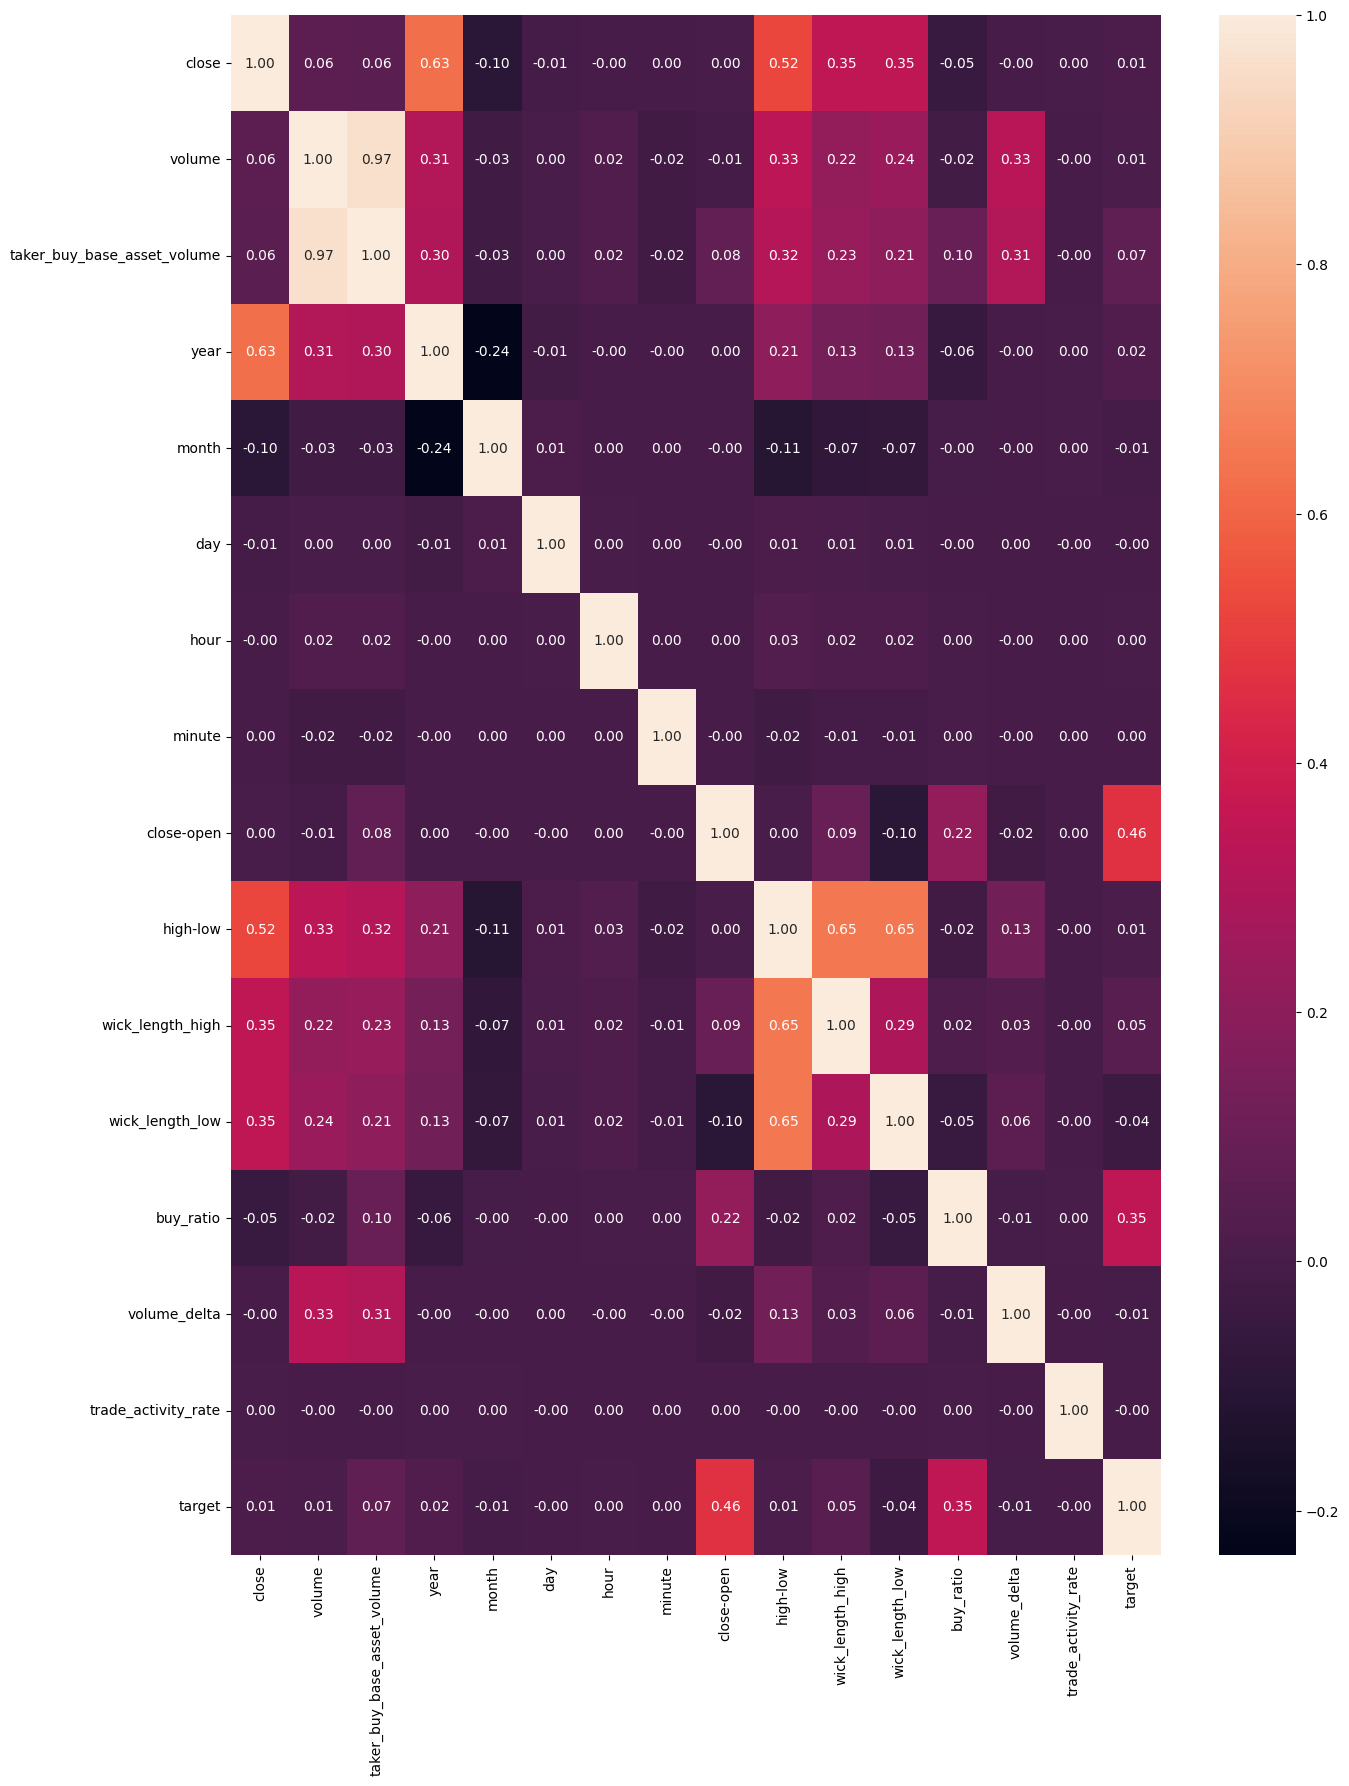

In [14]:
corr_mat = df.corr(numeric_only=True)

plt.figure(figsize = (15,20))
sns.heatmap(corr_mat, annot = True, cbar=True, fmt='.2f')
plt.savefig('../reports/feature_correlation_matrix.png')

In [13]:
del splitted, splitted1, splitted2

In [14]:
df.columns

Index(['close', 'volume', 'taker_buy_base_asset_volume', 'month', 'day',
       'hour', 'minute', 'close-open', 'high-low', 'wick_length_high',
       'wick_length_low', 'buy_ratio', 'volume_delta', 'trade_activity_rate',
       'target'],
      dtype='object')

In [20]:
df = df.astype(np.float32)

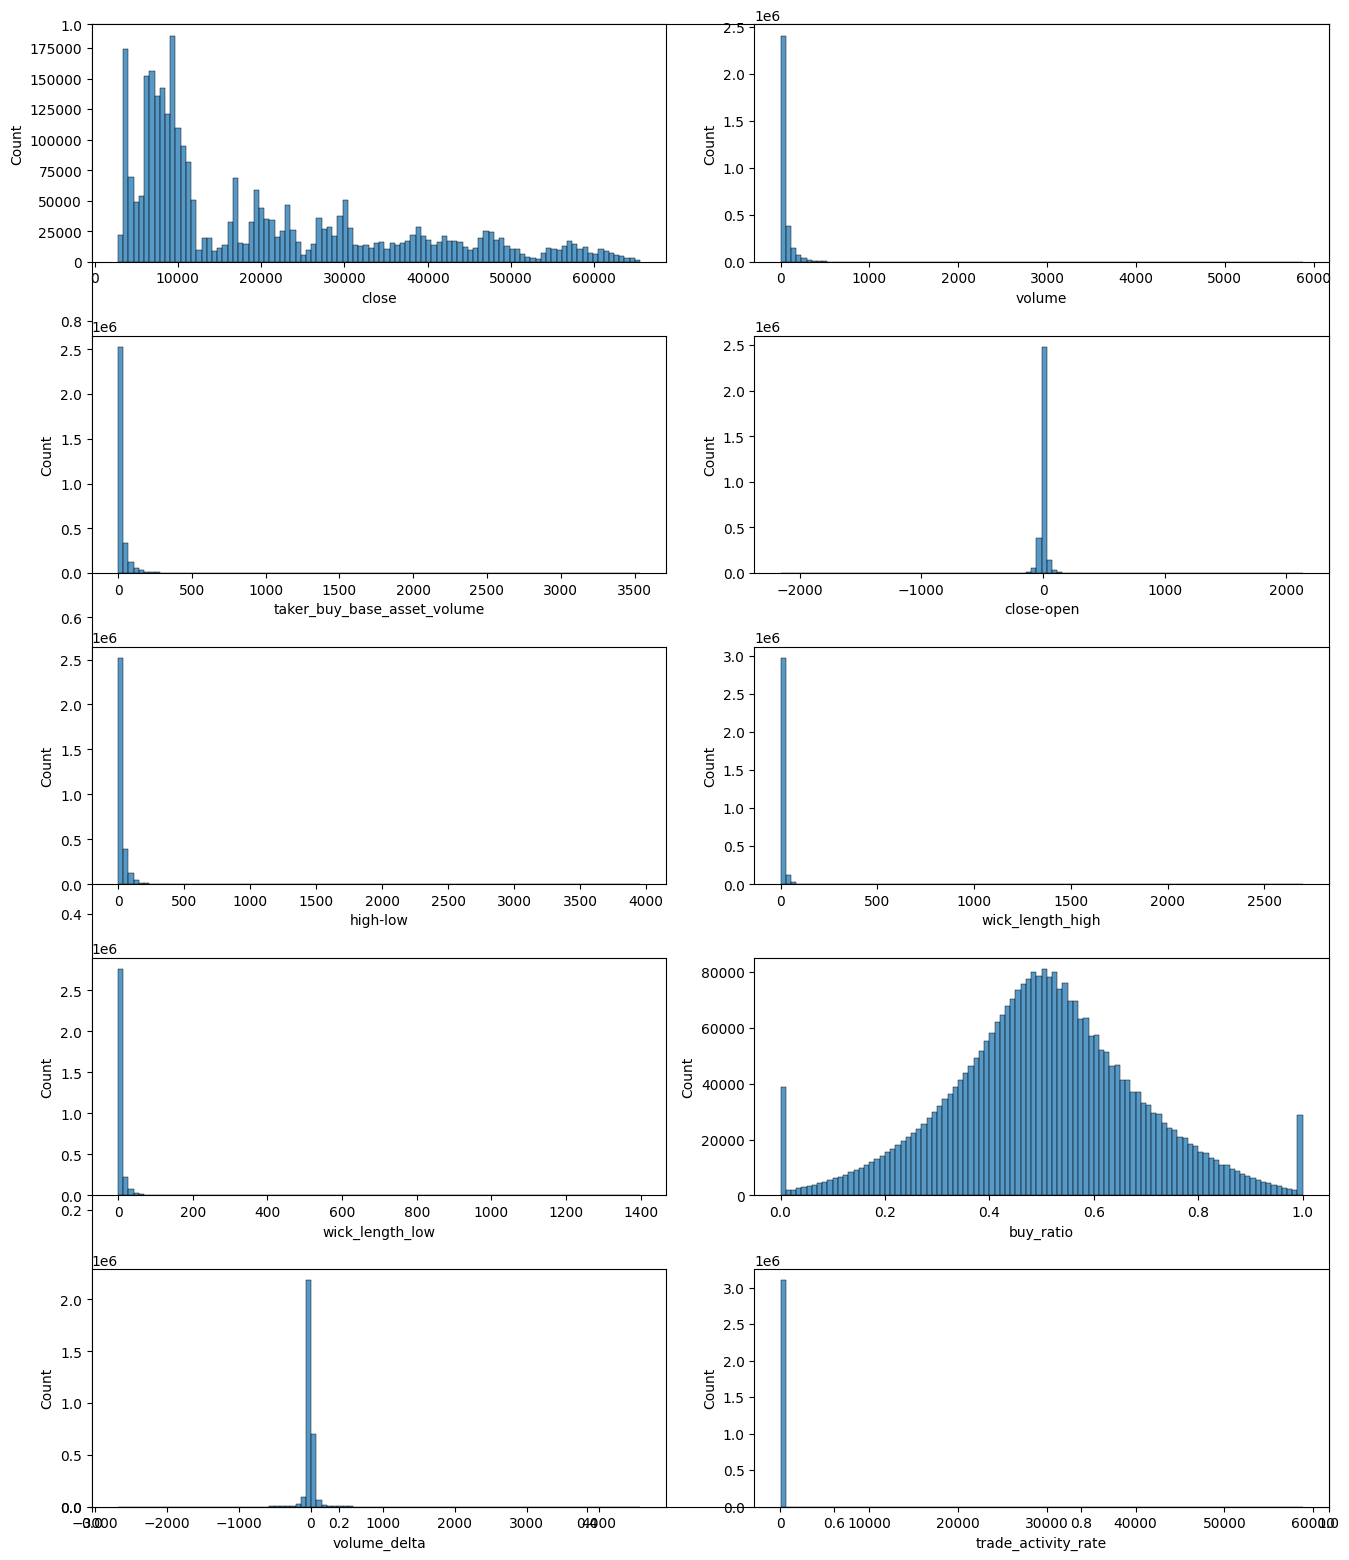

In [74]:
features = ['close', 'volume', 'taker_buy_base_asset_volume', 'close-open', 
            'high-low', 'wick_length_high', 'wick_length_low', 'buy_ratio', 
            'volume_delta', 'trade_activity_rate']

plt.subplots(figsize=(14,16))

for i, col in enumerate(features):
  plt.subplot(5,2,i+1)
  sns.histplot(df[col], kde=False, bins=100)

plt.tight_layout()
plt.savefig('../reports/feature_values_histograms.png')

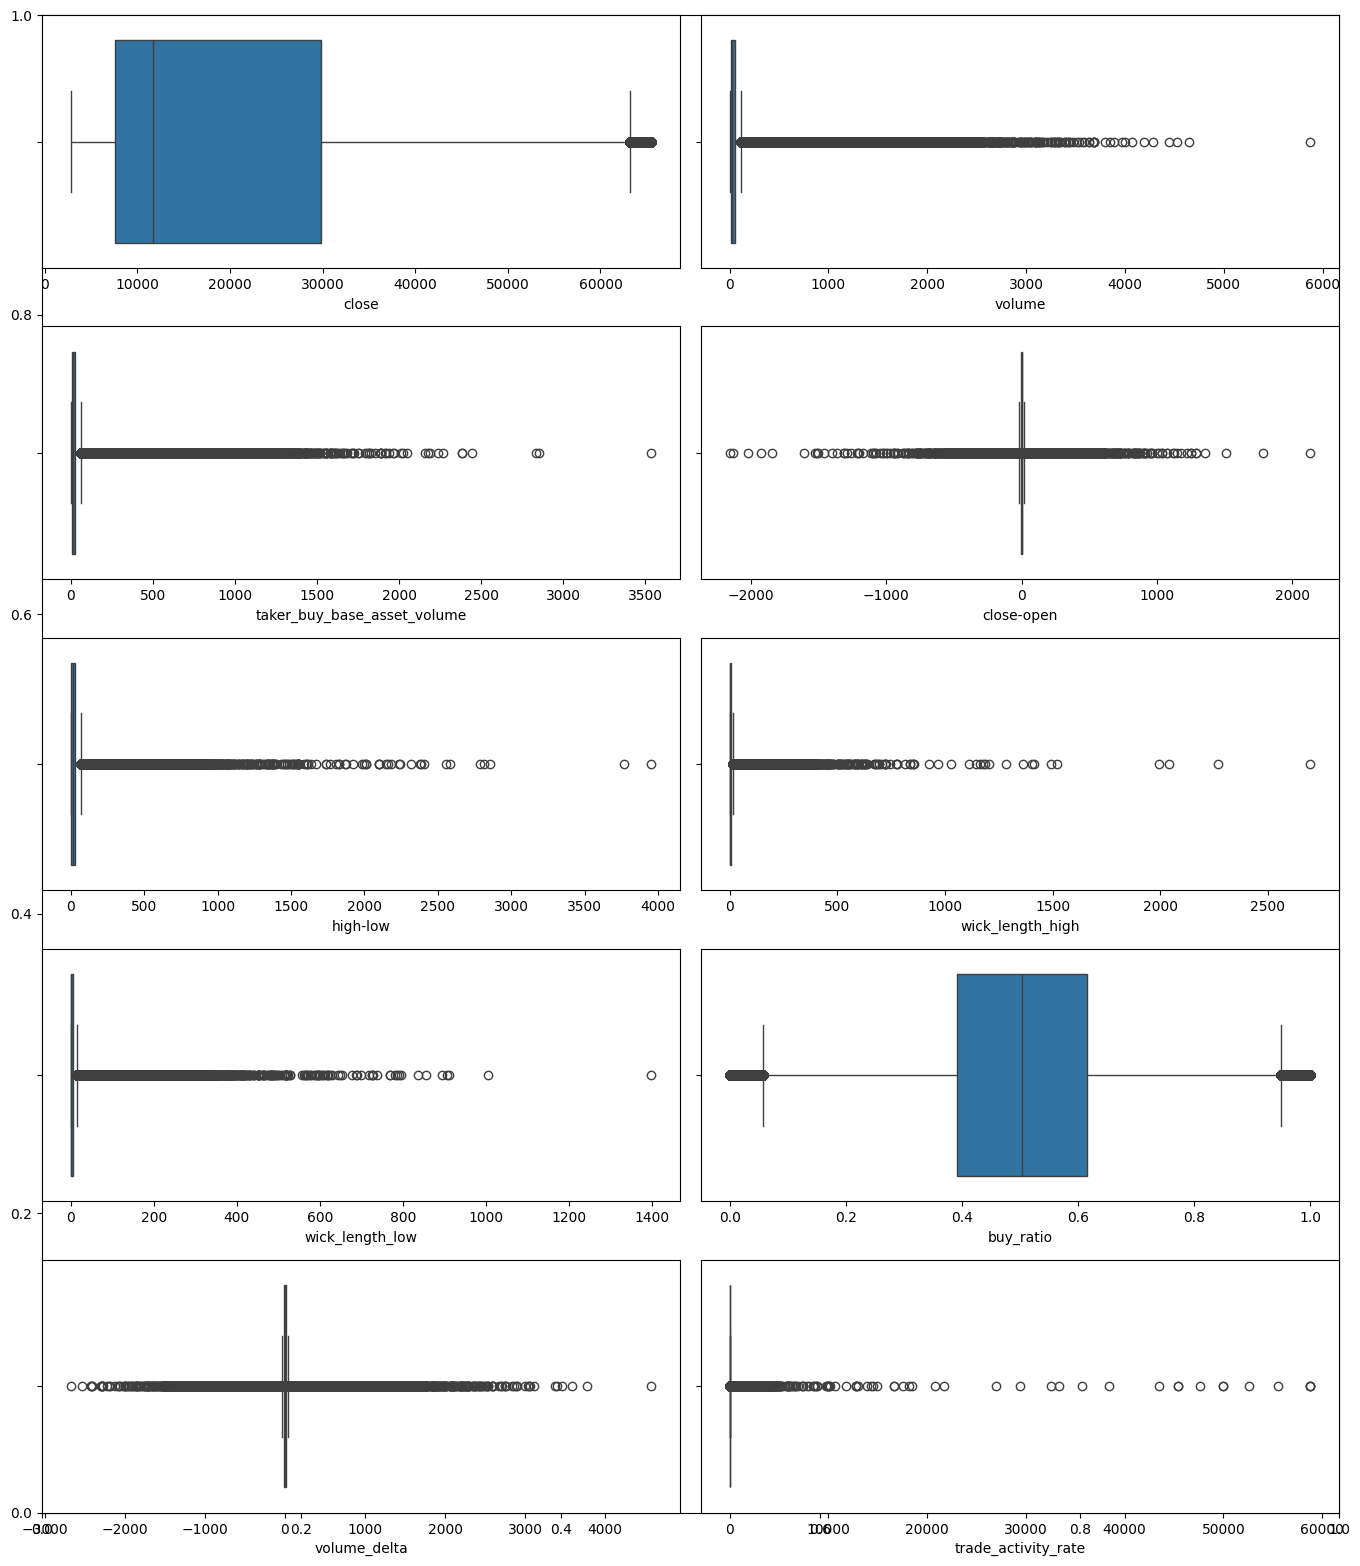

In [75]:
plt.subplots(figsize=(14,16))

for i, col in enumerate(features):
  plt.subplot(5, 2, i+1)
  sns.boxplot(x=df[col])

plt.tight_layout()
plt.savefig('../reports/feature_values_barplots.png')

In [122]:
len(df.loc[df['trade_activity_rate'] > 150])

2283

In [123]:
df = df.drop(df[df['close'] > 62000].index, axis=0)
df = df.drop(df[df['volume'] > 300].index, axis=0)
df = df.drop(df[df['taker_buy_base_asset_volume'] > 150].index, axis=0)
df = df.drop(df[(df['close-open'] > 100) | (df['close-open'] < -100)].index, axis=0)
df = df.drop(df[(df['high-low'] > 150)].index, axis=0)
df = df.drop(df[(df['wick_length_high'] > 50)].index, axis=0)
df = df.drop(df[(df['wick_length_low'] > 50)].index, axis=0)
df = df.drop(df[(df['volume_delta'] < -250) | (df['volume_delta'] > 250)].index, axis=0)
df = df.drop(df[df['trade_activity_rate'] > 150].index, axis=0)

In [124]:
df.shape

(2899281, 15)

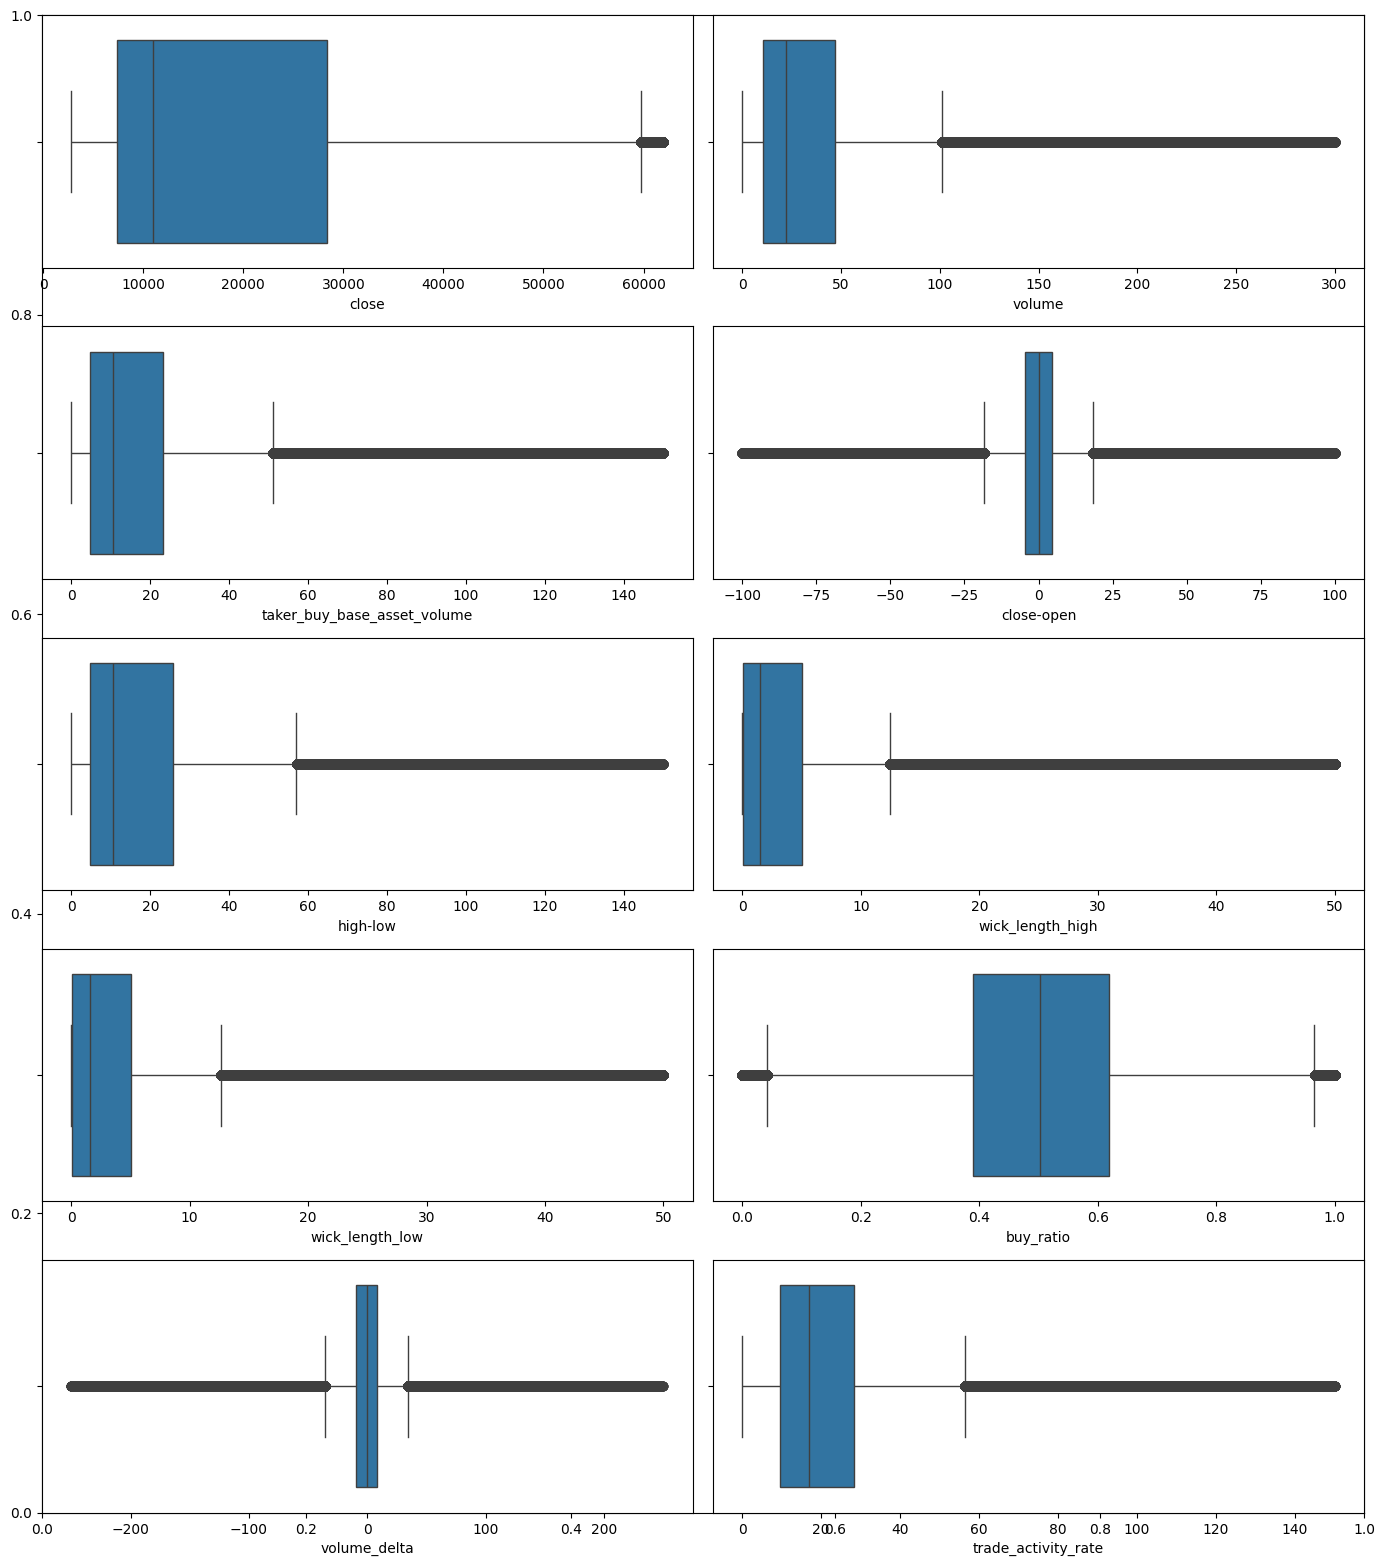

In [125]:
plt.subplots(figsize=(14,16))

for i, col in enumerate(features):
  plt.subplot(5, 2, i+1)
  sns.boxplot(x=df[col])

plt.tight_layout()
plt.savefig('../reports/feature_barplots_after_outlier_removal.png')

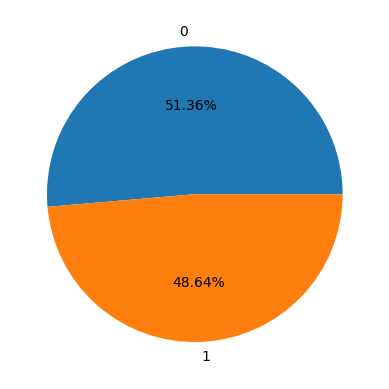

In [126]:
plt.pie(df['target'].value_counts().values, labels = [0,1], autopct = "%.2f%%")
plt.show()

## Feature Selection and Scaling

In [149]:
df.dropna(inplace=True)

In [150]:
X, Y = df.drop(['target'], axis=1), df['target']

In [151]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

In [156]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [157]:
scaler = RobustScaler()
scaler.set_output(transform='pandas')

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [158]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [162]:
estimator_lr = LogisticRegression(penalty='l1', C=1.0, class_weight='balanced', n_jobs=5, 
                                  random_state=42, solver='saga', max_iter=1000, verbose=1)

estimator_rfc  = RandomForestClassifier(n_estimators=80, max_depth=8, min_samples_split=100, 
                                        min_samples_leaf=50, bootstrap=True, oob_score=True, 
                                        n_jobs=5, random_state=42, verbose=1, class_weight='balanced')

cv = StratifiedKFold(n_splits=6, shuffle=True, random_state=42)

rfecv_lr = RFECV(estimator=estimator_lr, step=1, min_features_to_select=10, cv=cv, 
                 scoring='f1', verbose=2, n_jobs=5, importance_getter='auto')
rfecv_lr.set_output(transform='pandas')

rfecv_rfc = RFECV(estimator=estimator_rfc, step=1, min_features_to_select=10, cv=cv, 
                 scoring='f1', verbose=2, n_jobs=5, importance_getter='auto')
rfecv_rfc.set_output(transform='pandas')

RFECV(cv=StratifiedKFold(n_splits=6, random_state=42, shuffle=True),
      estimator=RandomForestClassifier(class_weight='balanced', max_depth=8,
                                       min_samples_leaf=50,
                                       min_samples_split=100, n_estimators=80,
                                       n_jobs=5, oob_score=True,
                                       random_state=42, verbose=1),
      min_features_to_select=10, n_jobs=5, scoring='f1', verbose=2)

In [163]:
rfecv_lr.fit(x_train_scaled, y_train)

Fitting estimator with 14 features.


[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.


convergence after 12 epochs took 17 seconds
Fitting estimator with 13 features.


[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.


convergence after 12 epochs took 17 seconds
Fitting estimator with 12 features.


[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.


convergence after 12 epochs took 17 seconds
Fitting estimator with 11 features.


[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.


convergence after 12 epochs took 16 seconds


[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.


convergence after 12 epochs took 16 seconds


[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.


convergence after 12 epochs took 17 seconds


RFECV(cv=StratifiedKFold(n_splits=6, random_state=42, shuffle=True),
      estimator=LogisticRegression(class_weight='balanced', max_iter=1000,
                                   n_jobs=5, penalty='l1', random_state=42,
                                   solver='saga', verbose=1),
      min_features_to_select=10, n_jobs=5, scoring='f1', verbose=2)

In [165]:
rfecv_lr.ranking_

array([1, 1, 1, 4, 3, 2, 5, 1, 1, 1, 1, 1, 1, 1])

In [166]:
rfecv_lr.n_features_

np.int64(10)

In [167]:
rfecv_rfc.fit(x_train, y_train)

Fitting estimator with 14 features.


[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   49.4s
[Parallel(n_jobs=5)]: Done  80 out of  80 | elapsed:  1.6min finished


Fitting estimator with 13 features.


[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   49.6s
[Parallel(n_jobs=5)]: Done  80 out of  80 | elapsed:  1.6min finished


Fitting estimator with 12 features.


[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   50.4s
[Parallel(n_jobs=5)]: Done  80 out of  80 | elapsed:  1.7min finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   52.8s
[Parallel(n_jobs=5)]: Done  80 out of  80 | elapsed:  1.7min finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   52.1s
[Parallel(n_jobs=5)]: Done  80 out of  80 | elapsed:  1.7min finished


RFECV(cv=StratifiedKFold(n_splits=6, random_state=42, shuffle=True),
      estimator=RandomForestClassifier(class_weight='balanced', max_depth=8,
                                       min_samples_leaf=50,
                                       min_samples_split=100, n_estimators=80,
                                       n_jobs=5, oob_score=True,
                                       random_state=42, verbose=1),
      min_features_to_select=10, n_jobs=5, scoring='f1', verbose=2)

In [169]:
rfecv_rfc.ranking_

array([1, 1, 1, 1, 2, 3, 4, 1, 1, 1, 1, 1, 1, 1])

In [170]:
rfecv_rfc.n_features_

np.int64(11)

In [171]:
from joblib import dump
with open('../models/rfecv_lr.joblib', 'wb') as f:
    dump(rfecv_lr, f)

In [ ]:
from joblib import dump
with open('../models/fitted_scaler.joblib', 'wb') as f:
    dump(scaler, f)

In [172]:
from joblib import dump
with open('../models/rfecv_rfc.joblib', 'wb') as f:
    dump(rfecv_rfc, f)

In [174]:
x_train_new = rfecv_rfc.transform(x_train)

In [177]:
x_test_new = rfecv_rfc.transform(x_test)

In [179]:
rob_scaler = RobustScaler()
rob_scaler.set_output(transform='pandas')

x_train_new_scaled = rob_scaler.fit_transform(x_train_new)
x_test_new_scaled = rob_scaler.transform(x_test_new)

In [182]:
from joblib import dump
with open('../models/rob_scaler.joblib', 'wb') as f:
    dump(rob_scaler, f)

In [181]:
x_train_new_scaled.shape

(1926529, 11)

## Model Training

In [183]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import HistGradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier

In [185]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=8, min_samples_split=200, min_samples_leaf=100, 
                             max_features=1.0, random_state=42, class_weight='balanced')

In [186]:
lc = LogisticRegression(penalty='l2', tol=0.0001, C=1.0, class_weight='balanced', 
                        random_state=42, solver='saga', max_iter=1000, verbose=1, n_jobs=5)

knc = KNeighborsClassifier(n_neighbors=15, weights='distance', algorithm='auto', p=2, 
                           metric='minkowski', n_jobs=5)

hgbc = HistGradientBoostingClassifier(loss='log_loss', learning_rate=0.1, max_iter=200, 
                                      max_leaf_nodes=31, max_depth=10, min_samples_leaf=100, 
                                      max_features=1.0, max_bins=255, categorical_features='from_dtype', 
                                      early_stopping='auto', scoring='f1', validation_fraction=0.2, 
                                      n_iter_no_change=10, tol=1e-07, verbose=1, random_state=42, 
                                      class_weight='balanced')

rfc = RandomForestClassifier(n_estimators=150, max_depth=10, min_samples_split=200, min_samples_leaf=100, 
                             max_features='sqrt', bootstrap=True, oob_score=True, n_jobs=5, 
                             random_state=42, verbose=1, class_weight='balanced')

abc = AdaBoostClassifier(estimator=dtc, n_estimators=150, learning_rate=0.5, random_state=42)

In [ ]:
lc.fit(x_train_new_scaled, y_train)
knc.fit(x_train_new_scaled, y_train)
hgbc.fit(x_train_new_scaled, y_train)
rfc.fit(x_train_new_scaled, y_train)
abc.fit(x_train_new_scaled, y_train)

[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.


convergence after 12 epochs took 17 seconds
Binning 0.136 GB of training data: 0.350 s
Binning 0.034 GB of validation data: 0.068 s
Fitting gradient boosted rounds:
Fit 11 trees in 7.635 s, (341 total leaves)
Time spent computing histograms: 0.612s
Time spent finding best splits:  0.025s
Time spent applying splits:      0.191s
Time spent predicting:           0.066s


[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:  1.1min
[Parallel(n_jobs=5)]: Done 150 out of 150 | elapsed:  3.9min finished


## Model Testing

In [ ]:
lc_preds = lc.predict(x_test_new_scaled)
knc_preds = knc.predict(x_test_new_scaled)
hgbc_preds = hgbc.predict(x_test_new_scaled)
rfc_preds = rfc.predict(x_test_new_scaled)
abc_preds = abc.predict(x_test_new_scaled)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

In [ ]:
accuracy_metrics = {}
model_preds = [lc_preds, knc_preds, hgbc_preds, rfc_preds, abc_preds]
model_names = ['Logistic Regression', 'K-Neighbors Classifier', 'Decision Tree Classifier', 
               'HistGradient Boosting Classifier']

accuracy_scores = [accuracy_score(preds, y_test) for preds in model_preds]
f1_scores = [f1_score(preds, y_test) for preds in model_preds]

for model, acc, f1 in zip(model_names, accuracy_scores, f1_scores):
    accuracy_metrics[model] = [{'Accuracy: ': round(acc*100, 2), 'F1: ': round(f1, 2)}]

In [ ]:
accuracy_metrics

In [41]:
# from pickle import dump
# with open('../models/k_neighbors_classifier.pkl', 'wb') as f:
#     dump(knc, f)

In [42]:
# with open('../models/decision_tree_classifier.pkl', 'wb') as f:
#     dump(dtc, f)

In [43]:
# with open('../models/hist_gradient_boosting_classifier.pkl', 'wb') as f:
#     dump(hgbc, f)

In [44]:
# with open('../models/logistic_regression.pkl', 'wb') as f:
#     dump(lc, f)

In [47]:
from sklearn.metrics import confusion_matrix
lc_cm = confusion_matrix(Y_test, lc_preds)
knc_cm = confusion_matrix(Y_test, knc_preds)
dtc_cm = confusion_matrix(Y_test, dtc_preds)
hgbc_cm = confusion_matrix(Y_test, hgbc_preds)

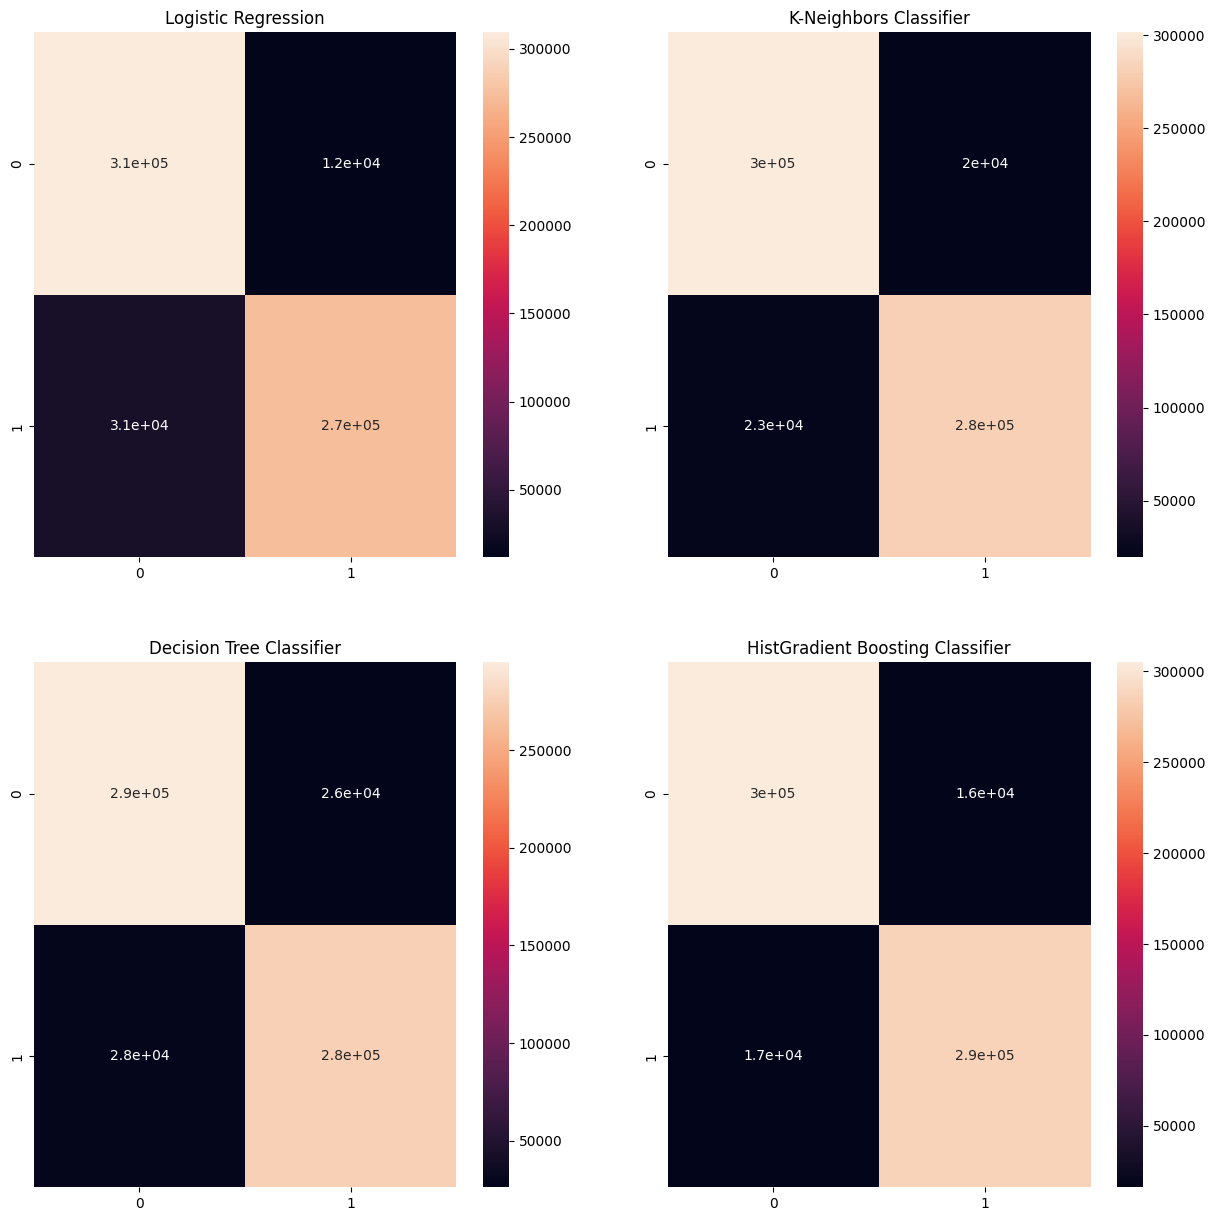

In [54]:
cm_list = [lc_cm, knc_cm, dtc_cm, hgbc_cm]
plt.subplots(2,2, figsize=(15, 15))

for i, model_cm in enumerate(cm_list):
    plt.subplot(2,2,i+1)
    sns.heatmap(model_cm, annot=True, cbar=True)
    plt.title(model_names[i])

# plt.savefig('../reports/Confusion Matrix of Models.png')
plt.show()